# Expedia Hotel Recommendations

## Importing the data

#### 1. Importing all libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

#### 2. Importing train data and describing the data

In [2]:
train = pd.read_csv("train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=10000)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id

In [13]:
train.describe()

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,6271.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.261400,2.744400,85.711700,272.578700,26941.592000,1833.809641,29121.770900,0.206600,0.220100,5.70210,...,0.349100,1.12780,14807.539200,2.641100,0.077700,1.456100,3.149200,80.198000,575.825700,49.120100
std,10.352004,0.590511,61.545901,178.451546,17472.051101,2028.265606,17115.773996,0.404886,0.414335,3.59959,...,0.761241,0.55308,11454.009352,2.203446,0.267712,1.167565,1.539213,55.267289,494.452768,28.705492
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.065100,12.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,172.000000,9876.000000,NaN,12950.000000,0.000000,0.000000,2.00000,...,0.000000,1.00000,8268.000000,1.000000,0.000000,1.000000,2.000000,50.000000,142.000000,25.000000
50%,2.000000,3.000000,66.000000,258.000000,25954.000000,NaN,30977.000000,0.000000,0.000000,9.00000,...,0.000000,1.00000,10970.500000,1.000000,0.000000,1.000000,2.000000,50.000000,544.000000,48.000000
75%,11.000000,3.000000,69.000000,354.000000,43175.000000,NaN,44663.000000,0.000000,0.000000,9.00000,...,0.000000,1.00000,18714.000000,5.000000,0.000000,1.000000,4.000000,105.000000,700.000000,73.000000
max,47.000000,4.000000,239.000000,1003.000000,56451.000000,11301.871400,54404.000000,1.000000,1.000000,9.00000,...,9.000000,8.00000,65035.000000,8.000000,1.000000,23.000000,6.000000,208.000000,2103.000000,99.000000


## Visualizing the data 

#### 1. Which country has the most number of hotels ?

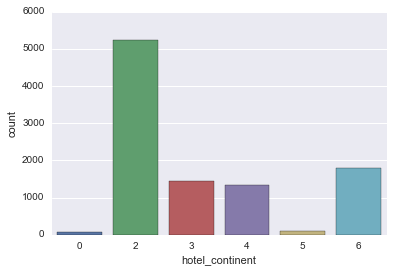

In [14]:
sns.countplot(x='hotel_continent', data=train)

In [113]:
top_ten_user_countries = train.groupby('user_location_country')['user_location_region'].count().sort_values(ascending=False)[:10]

In [114]:
user_location = pd.DataFrame(data=top_ten_user_countries, dtype=np.int64)

In [115]:
user_location_region = user_location['user_location_region']

In [116]:
user_location_country = user_location.iloc[:,1:]

In [117]:
user_location_region

user_location_country
66     5648
205    1040
3       723
23      398
46      329
69      242
231     189
133     114
70      111
209     108
Name: user_location_region, dtype: int64

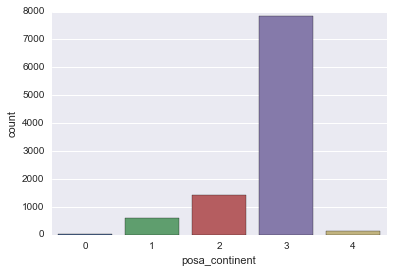

In [118]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(x='posa_continent', data=train)

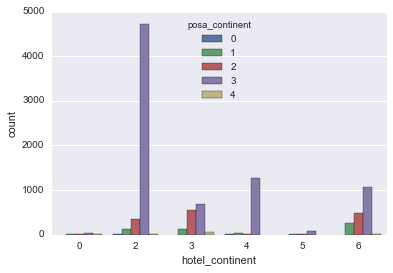

In [8]:
# putting the two above together
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

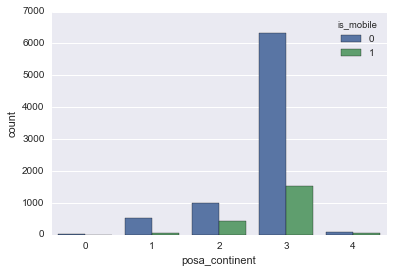

In [119]:
# how many people by continent are booking from mobile
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


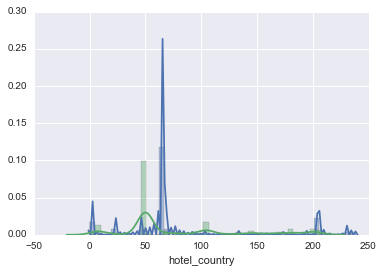

In [122]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")

In [127]:
# get number of booked nights as difference between check in and check out

hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights

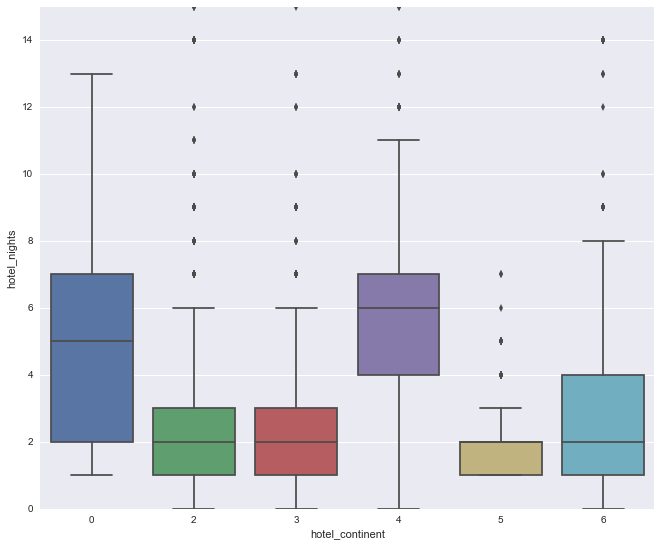

In [128]:
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

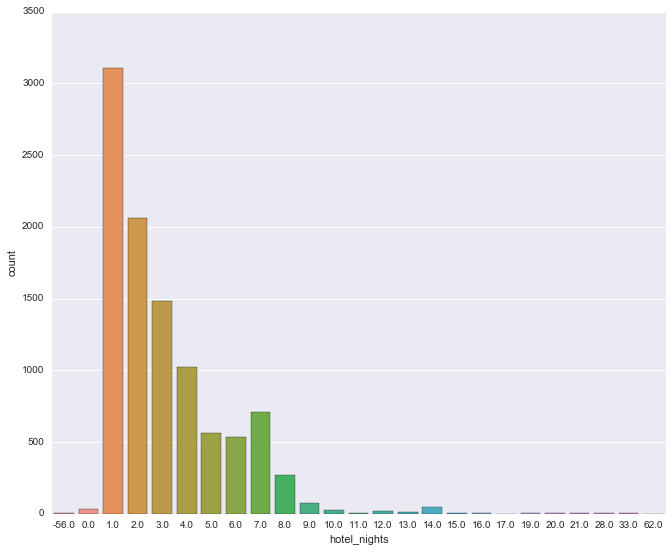

In [129]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

In [130]:
expedia_df = train.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)


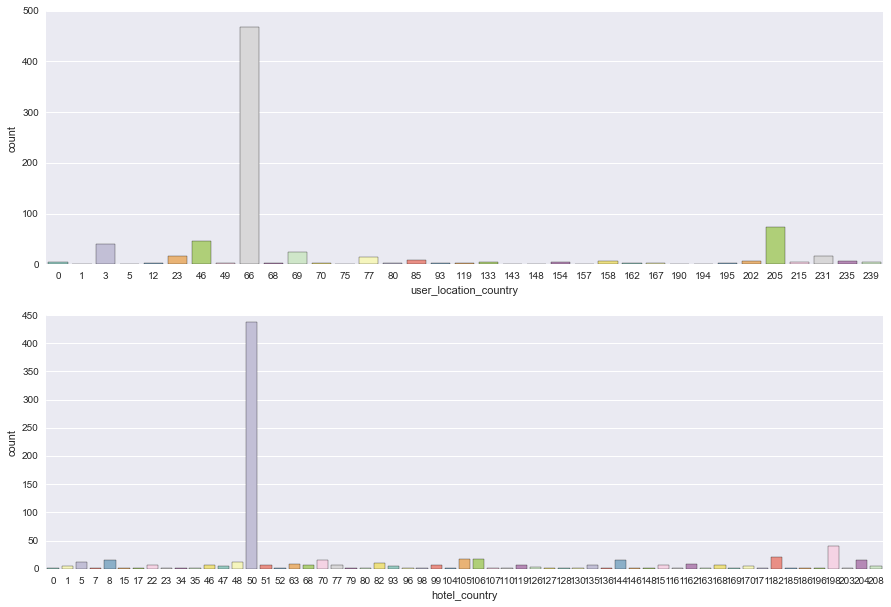

In [131]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = expedia_df[expedia_df["is_booking"] == 1]

# What are the most countries the customer travel from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")


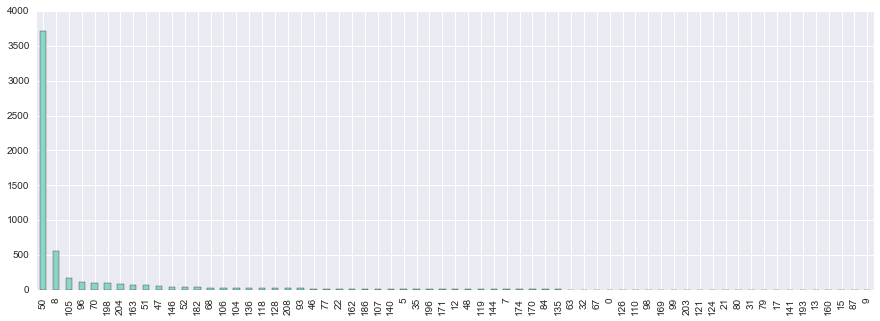

In [132]:
# Where do most of the customers from a country travel?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = expedia_df[expedia_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

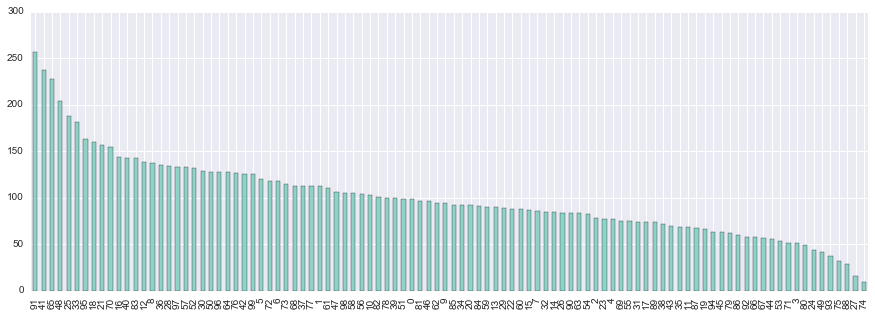

In [133]:
# Plot frequency for each hotel_clusters

expedia_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

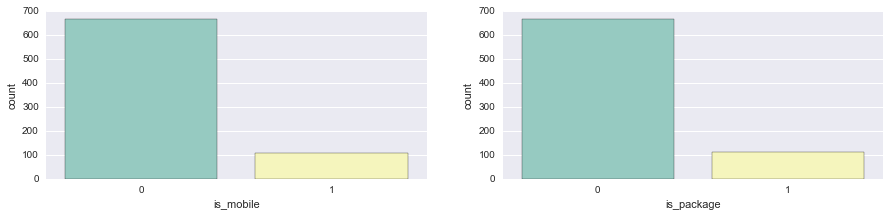

In [134]:
# Plot frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

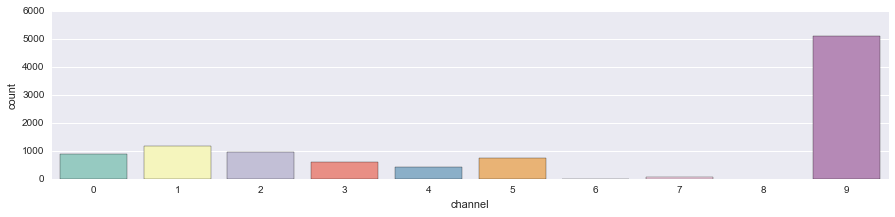

In [135]:
# What's the most impactful channel?

fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

sns.countplot(x='channel', order=list(range(0,10)), data=expedia_df, palette="Set3")

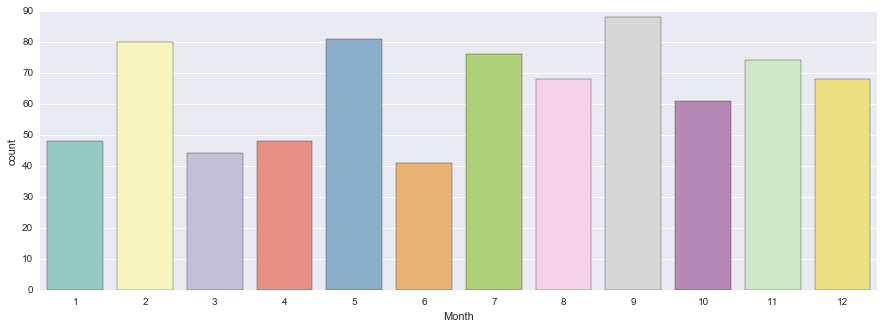

In [139]:
# Convert srch_ci to Year, Month, and Week

expedia_df['Year']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
expedia_df['Month']  = expedia_df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
expedia_df['Week']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=expedia_df[expedia_df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

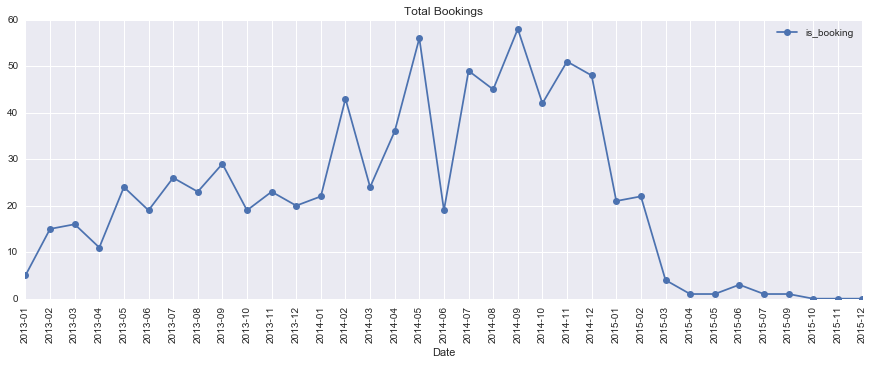

In [140]:
# Convert srch_ci column to Date(Y-M)
expedia_df['Date']  = expedia_df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = expedia_df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

## Cleaning the data

In [141]:
dtype={'is_booking':bool,
        'srch_ci' : np.str_,
        'srch_co' : np.str_,
        'srch_adults_cnt' : np.int32,
        'srch_children_cnt' : np.int32,
        'srch_rm_cnt' : np.int32,
        'srch_destination_id':np.str_,
        'user_location_country' : np.str_,
        'user_location_region' : np.str_,
        'user_location_city' : np.str_,
        'hotel_cluster' : np.str_,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.str_}

In [145]:
df0 = pd.read_csv('train.csv',dtype=dtype, usecols=dtype, parse_dates=['date_time'] ,sep=',', nrows=1000000).dropna()
df0['year']=df0['date_time'].dt.year
train = df0.query('is_booking==True & year==2014')

In [146]:
del df0

In [147]:
train['srch_ci']=pd.to_datetime(train['srch_ci'],infer_datetime_format = True,errors='coerce')
train['srch_co']=pd.to_datetime(train['srch_co'],infer_datetime_format = True,errors='coerce')

train['month']= train['date_time'].dt.month
train['plan_time'] = ((train['srch_ci']-train['date_time'])/np.timedelta64(1,'D')).astype(float)
train['hotel_nights']=((train['srch_co']-train['srch_ci'])/np.timedelta64(1,'D')).astype(float)

In [148]:
m=train.orig_destination_distance.mean()
train['orig_destination_distance']=train.orig_destination_distance.fillna(m)
train.fillna(-1,inplace=True)
lst_drop=['date_time','srch_ci','srch_co']
train.drop(lst_drop,axis=1,inplace=True)

In [149]:
y=train['hotel_cluster']
X=train.drop(['hotel_cluster','is_booking','year'],axis=1)

In [150]:
del train

In [152]:
X

,user_location_country,user_location_region,user_location_city,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,hotel_market,month,plan_time,hotel_nights
1,66,348,48862,2234.2641,2,0,1,8250,628,8,17.651250,4.0
79,66,462,41898,2454.8588,3,0,2,12009,680,1,49.312303,5.0
81,66,462,41898,2454.8588,2,0,1,12009,680,1,49.302130,5.0
83,66,462,41898,2454.8588,2,0,1,12009,680,1,51.283611,3.0
128,66,174,40365,8456.8294,2,0,2,1571,89,10,12.394225,1.0
133,66,174,21855,8393.1607,1,0,1,12861,89,12,5.584549,1.0
372,66,174,16634,3.3379,2,2,1,61531,1241,4,-0.405926,2.0
401,66,174,46432,112.9832,2,0,1,11835,633,10,5.225625,2.0
414,66,189,2871,1515.3055,1,0,1,26328,871,5,-0.428472,1.0
781,46,171,43387,1103.4275,5,1,3,8245,245,2,130.456227,5.0


# Naive Bayes Implementation 

In [153]:
#The separateByClass() function

def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated


In [157]:
np_X = X.as_matrix()

In [164]:
np_X[0]

array(['66', '348', '48862', 2234.2641, 2, 0, 1, '8250', '628', 8,
       17.65125, 4.0], dtype=object)

In [158]:
separateByClass(np_X)

{1.0: [array(['66', '174', '40365', 8456.8294, 2, 0, 2, '1571', '89', 10,
         12.394224537037037, 1.0], dtype=object),
  array(['66', '174', '21855', 8393.1607, 1, 0, 1, '12861', '89', 12,
         5.584548611111111, 1.0], dtype=object),
  array(['66', '189', '2871', 1515.3055, 1, 0, 1, '26328', '871', 5,
         -0.4284722222222222, 1.0], dtype=object),
  array(['46', '171', '15334', 119.462, 2, 0, 1, '17459', '24', 8,
         -0.5155902777777778, 1.0], dtype=object),
  array(['46', '171', '15334', 5863.6256, 2, 0, 1, '22430', '1517', 10,
         125.24435185185185, 1.0], dtype=object),
  array(['205', '354', '25315', 97.015, 2, 0, 1, '24648', '572', 7,
         11.435347222222223, 1.0], dtype=object),
  array(['66', '174', '14752', 8320.7631, 1, 0, 1, '12471', '153', 9,
         7.173634259259259, 1.0], dtype=object),
  array(['66', '174', '14752', 2592.7152, 1, 0, 1, '8223', '690', 9,
         4.211168981481482, 1.0], dtype=object),
  array(['66', '348', '10388', 45.8682, 2,

In [159]:
import math
def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

In [160]:
def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries

In [182]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        print(instances)
        summaries[classValue] = summarize(instances)
    return summaries

In [162]:
import math
def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [163]:
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.iteritems():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities

In [167]:
def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities

In [171]:
summaries = {0:[(1, 0.5)], 1:[(20, 5.0)]}
inputVector = [1.1, '?']
probabilities = calculateClassProbabilities(summaries, inputVector)
print('Probabilities for each class: {0}'.format(probabilities))

Probabilities for each class: {0: 0.7820853879509118, 1: 6.298736258150442e-05}


In [174]:
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

In [175]:
summaries = {'A':[(1, 0.5)], 'B':[(20, 5.0)]}
inputVector = [1.1, '?']
result = predict(summaries, inputVector)
print('Prediction: {0}'.format(result))

Prediction: A


In [183]:
summaries = summarizeByClass(np_X)

[array(['66', '174', '40365', 8456.8294, 2, 0, 2, '1571', '89', 10,
       12.394224537037037, 1.0], dtype=object), array(['66', '174', '21855', 8393.1607, 1, 0, 1, '12861', '89', 12,
       5.584548611111111, 1.0], dtype=object), array(['66', '189', '2871', 1515.3055, 1, 0, 1, '26328', '871', 5,
       -0.4284722222222222, 1.0], dtype=object), array(['46', '171', '15334', 119.462, 2, 0, 1, '17459', '24', 8,
       -0.5155902777777778, 1.0], dtype=object), array(['46', '171', '15334', 5863.6256, 2, 0, 1, '22430', '1517', 10,
       125.24435185185185, 1.0], dtype=object), array(['205', '354', '25315', 97.015, 2, 0, 1, '24648', '572', 7,
       11.435347222222223, 1.0], dtype=object), array(['66', '174', '14752', 8320.7631, 1, 0, 1, '12471', '153', 9,
       7.173634259259259, 1.0], dtype=object), array(['66', '174', '14752', 2592.7152, 1, 0, 1, '8223', '690', 9,
       4.211168981481482, 1.0], dtype=object), array(['66', '348', '10388', 45.8682, 2, 0, 1, '11361', '591', 3,
       25.40

TypeError: 'int' object is not callable